In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

### Read Data

In [2]:
file_name = 'Heineken - Data Science Use Case.csv'
df_raw_data = pd.read_csv(file_name)
df_raw_data.sample(5)

,Unnamed: 0,Job ID,Date/Time,Roast amount (kg),1st malt amount (kg),2nd malt amount (kg),MT - Temperature,MT - Time,WK - Temperature,WK - Steam,...,pH,Extract,Color,WOC - Time,WHP Transfer - Time,WHP Rest - Time,Roast color,1st malt color,2nd malt color,Product
83,83,2449965230,11/8/2020 1:32,38.915013,14001.33750,6080.511792,67.208414,6715.525,105.373703,6794.00,...,5.656926,15.226016,12.793336,3144.375,731.000,14.494583,908.375,5.9125,6.0200,AMST
43,43,2449962896,10/31/2020 22:12,64.392461,13981.76179,6070.525000,66.866813,6776.800,105.338846,6482.25,...,5.675958,15.453057,NaN,3146.525,733.150,14.512500,908.375,6.1275,6.0200,AMST
133,133,2449968015,11/16/2020 5:41,53.427513,14032.28679,6120.555542,66.901670,6628.450,105.338846,6944.50,...,5.666686,14.766053,12.700267,3155.125,808.400,14.494583,908.375,6.0200,6.0200,AMST
172,172,2449969544,11/20/2020 15:23,21.284987,13443.62771,9296.224170,67.002759,6868.175,105.237753,7492.75,...,5.796495,15.081638,13.434363,4105.425,822.375,14.494583,908.375,6.1275,6.0200,HNK
4,4,2449960799,10/25/2020 19:33,21.177513,24607.28750,0.000000,67.037616,6357.550,105.237753,8213.00,...,NaN,15.270026,13.847422,3717.350,824.525,14.494583,908.375,6.5575,6.1275,HNK


### data train and data test, filter product AMST

In [3]:
df_train = df_raw_data[(~df_raw_data['Color'].isnull()) & (df_raw_data['Product']=='AMST')].copy()
df_test = df_raw_data[(df_raw_data['Color'].isnull()) & (df_raw_data['Product']=='AMST')].copy()
df_train.shape, df_test.shape

((150, 22), (30, 22))

### explore data for each variable

In [4]:
all_features = ['Roast amount (kg)','1st malt amount (kg)', '2nd malt amount (kg)', 'MT - Temperature','MT - Time', 'WK - Temperature', 'WK - Steam', 'WK - Time','Total cold wort', 'pH', 'Extract', 'Color', 'WOC - Time',
       'WHP Transfer - Time', 'WHP Rest - Time', 'Roast color','1st malt color', '2nd malt color']

for variable_name in all_features:
    print('\n-----------')
    print('variable: ', variable_name)
    print('nrows:', df_train[variable_name].count())
    print('nrows with nan:', df_train[variable_name].isna().sum())
    print('variance:', df_train[variable_name].std().round(2))
    print(['Q(' + str(round(x,2)) + '): ' + str(df_train[variable_name].quantile(x).round(2)) for x in np.arange(0,1.01,0.05)])




-----------
variable:  Roast amount (kg)
nrows: 147
nrows with nan: 3
variance: 18.1
['Q(0.0): 17.42', 'Q(0.05): 21.13', 'Q(0.1): 23.07', 'Q(0.15): 23.64', 'Q(0.2): 24.51', 'Q(0.25): 24.72', 'Q(0.3): 25.67', 'Q(0.35): 26.17', 'Q(0.4): 27.63', 'Q(0.45): 27.74', 'Q(0.5): 28.17', 'Q(0.55): 30.35', 'Q(0.6): 50.14', 'Q(0.65): 53.54', 'Q(0.7): 53.96', 'Q(0.75): 64.18', 'Q(0.8): 64.18', 'Q(0.85): 64.28', 'Q(0.9): 64.5', 'Q(0.95): 64.61', 'Q(1.0): 88.04']

-----------
variable:  1st malt amount (kg)
nrows: 150
nrows with nan: 0
variance: 1369.92
['Q(0.0): 0.0', 'Q(0.05): 12564.86', 'Q(0.1): 12574.26', 'Q(0.15): 12582.96', 'Q(0.2): 12592.93', 'Q(0.25): 13944.86', 'Q(0.3): 14003.41', 'Q(0.35): 14015.31', 'Q(0.4): 14021.88', 'Q(0.45): 14029.57', 'Q(0.5): 14041.3', 'Q(0.55): 14051.15', 'Q(0.6): 14063.22', 'Q(0.65): 14069.75', 'Q(0.7): 14081.5', 'Q(0.75): 14087.3', 'Q(0.8): 14090.98', 'Q(0.85): 14098.38', 'Q(0.9): 14117.85', 'Q(0.95): 14176.67', 'Q(1.0): 16092.75']

-----------
variable:  2nd malt

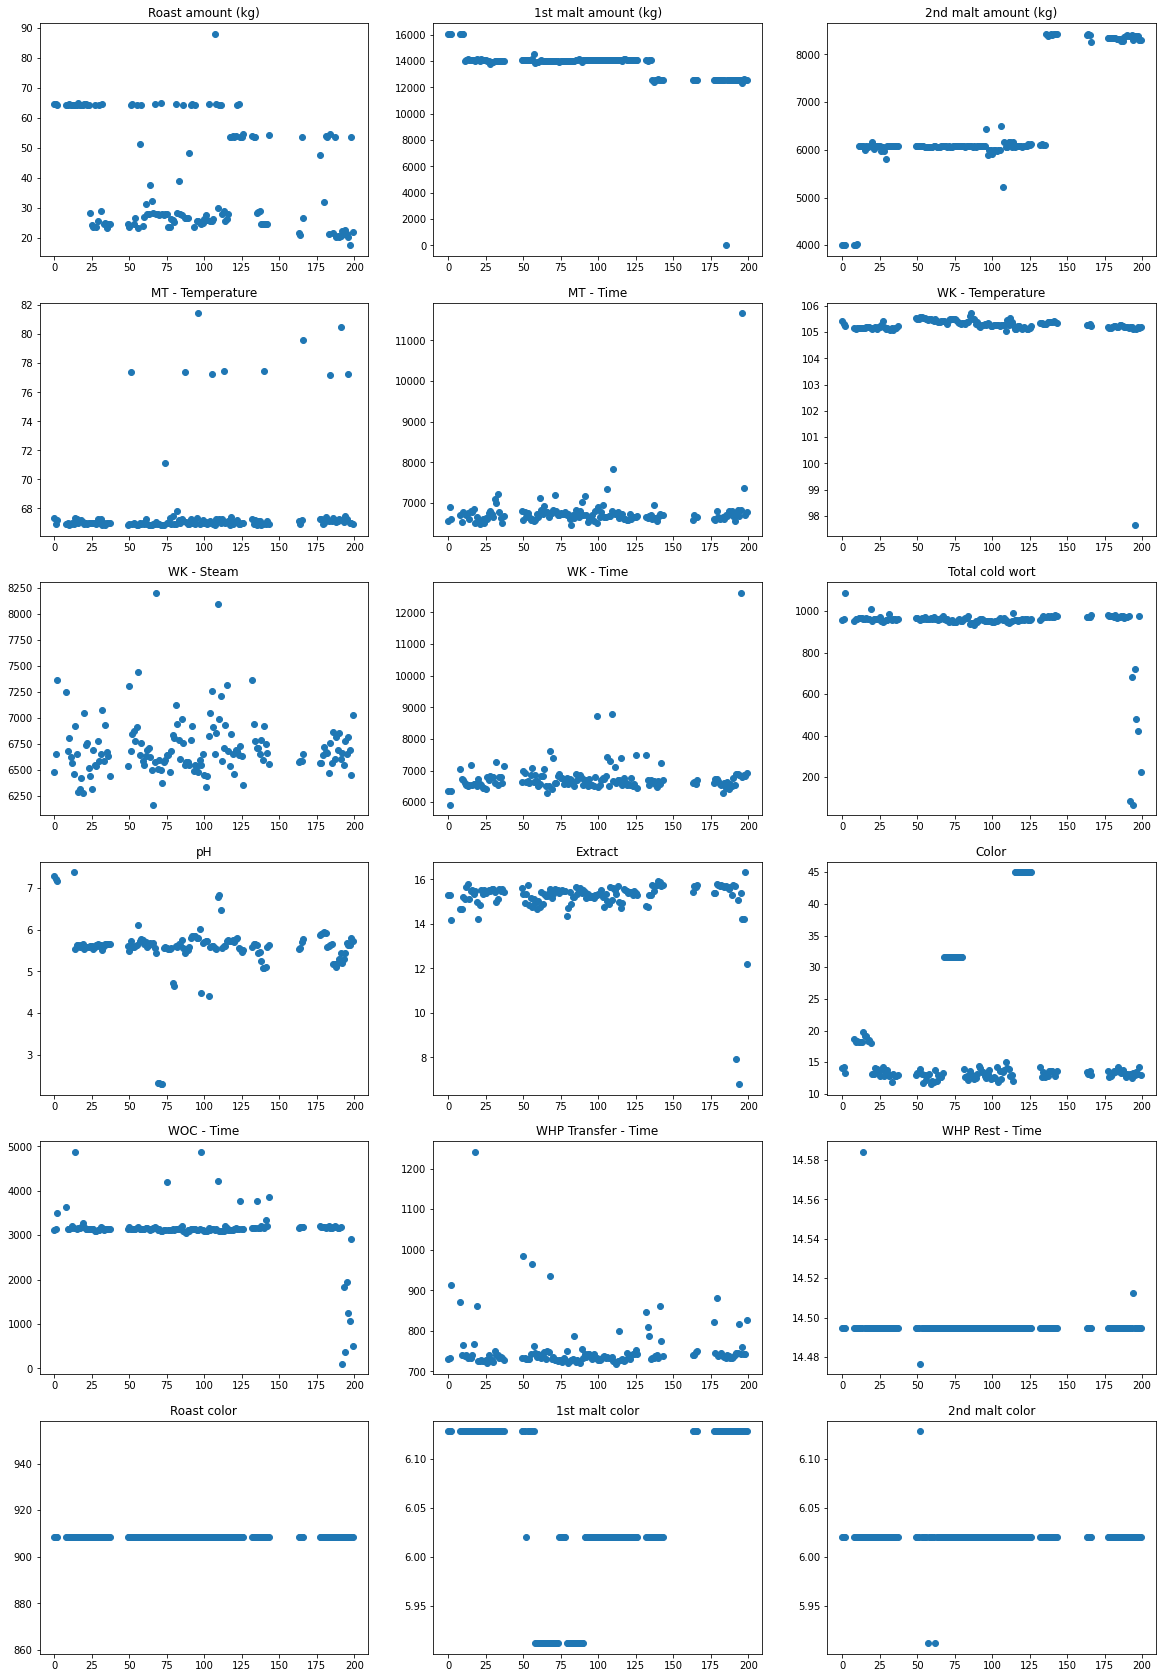

In [5]:
PLOTS_PER_ROW = 3
fig, axs = plt.subplots(math.ceil(len(all_features)/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(20, 30))
i,j=0,0
for variable_name in all_features:
    axs[i][j].scatter(df_train[variable_name].index, df_train[variable_name], label = variable_name)
    axs[i][j].set_title(variable_name)
    j+=1
    if j%PLOTS_PER_ROW==0:
        i+=1
        j=0

plt.show()

### Keypoint of data

- **Roast amount (kg)**: Variable with 3 nan values, high variance, high range (min=17, max=88), observed in plot there are 2 range of data (20-30, 60-70)
- **1st malt amount (kg)**: There are some data with zero values, although that range of data is between 1200kg a 1600kg 
- **2nd malt amount (kg)**: In plot, observed in plot there are 2 range of data (aprox 4000kg, aprox 8000kg)
- **MT - Temperature** : No comment of data
- **MT - Time** : There is 1 possible outlier ( >11600)
- **WK - Temperature** : No comment of data
- **WK - Steam** : No comment of data
- **WK - Time** : There is 1 possible outlier ( > 12600) 
- **Total cold wort** : Warning for value less then Q(0.05) 
- **pH** : No comment of data
- **extract** : Warning for value less then Q(0.05) 
- **Color** : Warning for value more then Q(0.85) 
- **WOC - Time** : Warning for value less then Q(0.05) 
- **WHP Transfer - Time** : No comment of data
- **WHP Rest - Time** : No comment of data
- **Roast color** : Variance equal zero  
- **1st malt color** :  No comment of data
- **2nd malt color** :  No comment of data

### Association with Response Variable

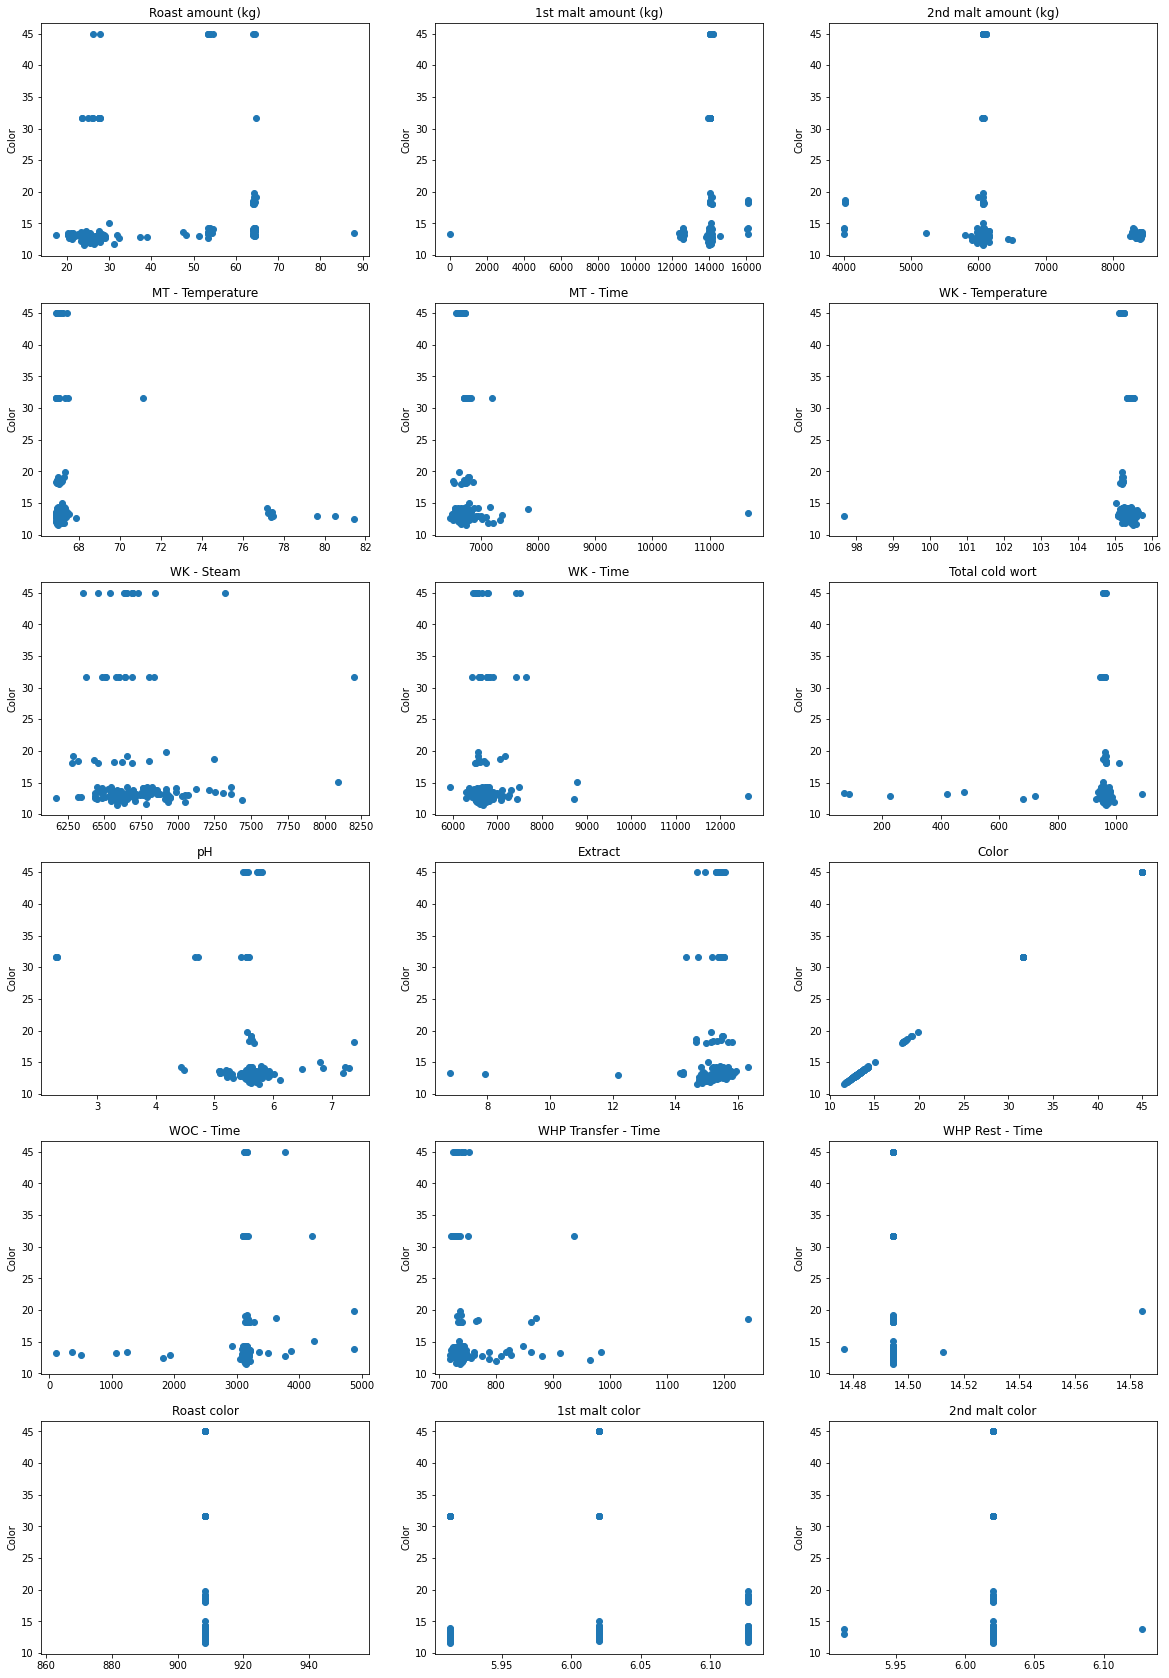

In [6]:
PLOTS_PER_ROW = 3
fig, axs = plt.subplots(math.ceil(len(all_features)/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(20, 30))
i,j=0,0
for variable_name in all_features:
    axs[i][j].scatter(df_train[variable_name], df_train['Color'], label = variable_name)
    axs[i][j].set_ylabel("Color")
    axs[i][j].set_title(variable_name)
    j+=1
    if j%PLOTS_PER_ROW==0:
        i+=1
        j=0

plt.show()

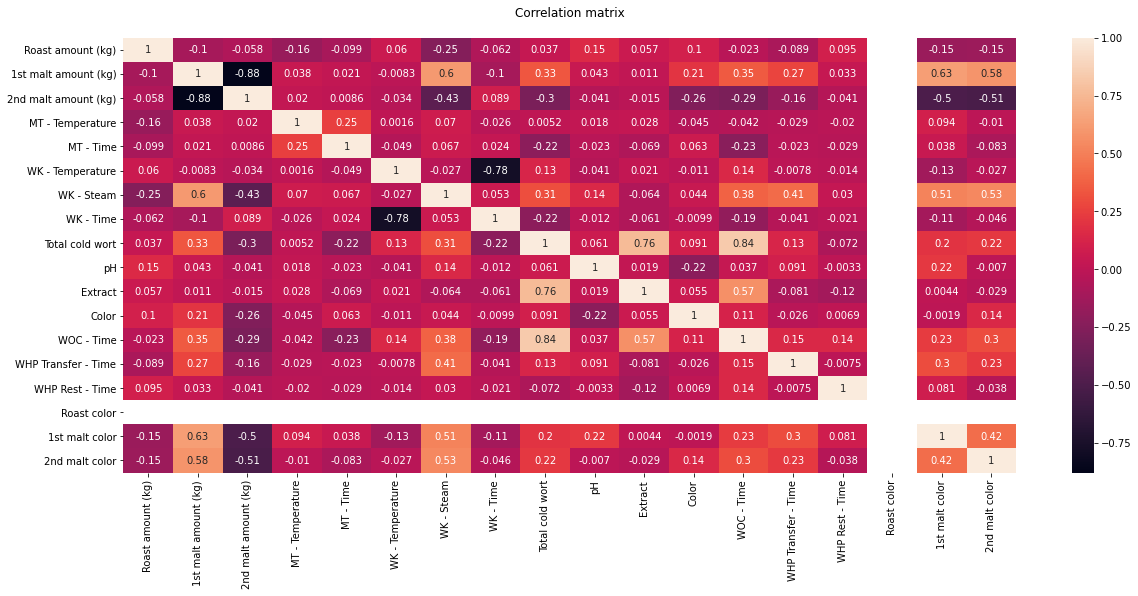

In [7]:
import seaborn  

f, ax = plt.subplots(figsize=(20, 8))
correlation = df_raw_data[all_features].corr()  
heatmap = seaborn.heatmap(correlation, annot = True)  
heatmap.set(title = "Correlation matrix\n")  
plt.show()  

### Keypoint of data - Association with variable Color

- Individual plot not detect linear association with variable and Color
- In general lower association with Color
- Top 3 correlation with color is, 1st malt amount (kg), 2nd malt amount (kg) and ph with 0.21, -0.26 and -0.22 respectively


### Feature engineering

- Explore data analysis suggest some modifications in data
    - **Roast amount (kg)**: Replace nan to mean
    - **1st malt amount (kg)**: replace zero to mean
    - **2nd malt amount (kg)**: replace zero to mean
    - **MT - Time**: There are outlier and will replace highies value to Q98
    - **WK - Time**: There are outlier and will replace highies value to Q98 
    - **ph**: Replace nan to mean

In [83]:
df_train['Roast amount (kg)'] = np.where(df_train['Roast amount (kg)'].isnull(),df_train['Roast amount (kg)'].mean(), df_train['Roast amount (kg)'])
df_train['1st malt amount (kg)'] = np.where(df_train['1st malt amount (kg)']==0,df_train['1st malt amount (kg)'].mean(), df_train['1st malt amount (kg)'])
df_train['2nd malt amount (kg)'] = np.where(df_train['2nd malt amount (kg)']==0,df_train['2nd malt amount (kg)'].mean(), df_train['2nd malt amount (kg)'])
df_train['MT - Time'] = np.where(df_train['MT - Time']>11500,df_train['MT - Time'].quantile(0.98), df_train['MT - Time'])
df_train['WK - Time'] = np.where(df_train['WK - Time']>12500,df_train['WK - Time'].quantile(0.98), df_train['WK - Time'])
df_train['pH'] = np.where(df_train['pH'].isnull(),df_train['pH'].mean(), df_train['pH'])
                                            

## Fit Model

### Statistical Model


The main idea is create a regression linear model using features to independent variables and color to dependent variable.

The Model:

$
  Y = log(A1) + log(A2) + log(A3) + log(A4) + log(A5) + log(A6) + log(A7) + log(A8) + A9 + A10 + log(A11) + log(A12) + A13 + A14 + A15 + e
$

Where,

    Y = Color
    
    A1 = 1st malt amount (kg)
    A2 = 2nd malt amount (kg)
    A3 = MT - Temperature
    A4 = MT - Time
    A5 = WK - Temperature
    A6 = WK - Steam
    A7 = WK - Time
    A8 = Total cold wort
    A9 = pH
    A10 = Extract
    A11 = WOC - Time
    A12 = WHP Transfer - Time
    A13 = WHP Rest - Time
    A14 = 1st malt color
    A15 = 2nd malt color
    e = Random variable with Normal N(0,1)
    
The decision to apply the log function in some variables is because this variable presents values higher to the dependence variable Color, the problem is this we create bias at the estimator

We not considered variable *Roast color*, because this variable is a constant is mean there are not variance.

In [150]:
df_data_model = df_train.copy()
df_data_model['log_a1'] = np.log(df_data_model['1st malt amount (kg)'])
df_data_model['log_a2'] = np.log(df_data_model['2nd malt amount (kg)'])
df_data_model['log_a3'] = np.log(df_data_model['MT - Temperature'])
df_data_model['log_a4'] = np.log(df_data_model['MT - Time'])
df_data_model['log_a5'] = np.log(df_data_model['WK - Temperature'])
df_data_model['log_a6'] = np.log(df_data_model['WK - Steam'])
df_data_model['log_a7'] = np.log(df_data_model['WK - Time'])
df_data_model['log_a8'] = np.log(df_data_model['Total cold wort'])
df_data_model['a9'] = df_data_model['pH']
df_data_model['a10'] = df_data_model['Extract']
df_data_model['log_a11'] = np.log(df_data_model['WOC - Time'])
df_data_model['log_a12'] = np.log(df_data_model['WHP Transfer - Time'])
df_data_model['a13'] = df_data_model['WHP Rest - Time']
df_data_model['a14'] = df_data_model['1st malt color']
df_data_model['a15'] = df_data_model['2nd malt color']



features_model = ['log_a1', 'log_a2','log_a3', 'log_a4', 'log_a5', 'log_a6', 'log_a7', 'log_a8', 'a9', 'a10', 'log_a11', 'log_a12', 'a13', 'a14', 'a15']
#features_model = ['log_a1'] 

Y = df_data_model[['Color']]
X = df_data_model[features_model]
nrows = len(Y)
print(X.shape, Y.shape)

(150, 15) (150, 1)


In [151]:
X

,log_a1,log_a2,log_a3,log_a4,log_a5,log_a6,log_a7,log_a8,a9,a10,log_a11,log_a12,a13,a14,a15
0,9.683589,8.294015,4.209353,8.786724,4.657844,8.776823,8.758581,6.865787,7.296127,15.309445,8.047542,6.592942,14.494583,6.1275,6.02
1,9.684576,8.295113,4.203693,8.837779,4.656851,8.803011,8.687729,6.870261,7.219022,15.285057,8.050632,6.597350,14.494583,6.1275,6.02
2,9.684225,8.293289,4.207332,8.797016,4.656222,8.904325,8.758750,6.992992,7.182910,14.155171,8.158423,6.816380,14.494583,6.1275,6.02
8,9.685807,8.296790,4.203224,8.811056,4.655559,8.888136,8.860304,6.861292,5.562243,14.656477,8.197064,6.769355,14.494583,6.1275,6.02
9,9.686124,8.297087,4.204734,8.783599,4.655228,8.807846,8.816490,6.871377,5.562243,14.653028,8.050974,6.607562,14.494583,6.1275,6.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,9.438689,9.034578,4.208317,8.829947,4.581490,8.803011,8.942753,6.582579,5.675958,15.391623,7.568418,6.610460,14.494583,6.1275,6.02
196,9.421648,9.034730,4.346832,8.901483,4.654896,8.826955,8.824428,6.174879,5.642286,14.229196,7.122443,6.634765,14.494583,6.1275,6.02
197,9.444627,9.034506,4.204213,8.905492,4.655891,8.809452,8.834810,6.046130,5.632526,14.224360,6.981075,6.609012,14.494583,6.1275,6.02
198,9.438865,9.023353,4.204734,8.811537,4.655559,8.771835,8.826955,6.882463,5.801374,16.320075,7.978500,6.609012,14.494583,6.1275,6.02


In [152]:
Y

,Color
0,14.156956
1,14.270939
2,13.269140
8,18.693288
9,18.176702
...,...
195,12.937645
196,13.444820
197,13.181298
198,14.270939


In [153]:
import statsmodels.api as sm

full_model = sm.OLS(Y, X)
full_model_fit = full_model.fit()
full_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Color   R-squared (uncentered):                   0.808
Model:                            OLS   Adj. R-squared (uncentered):              0.787
Method:                 Least Squares   F-statistic:                              37.95
Date:                Sun, 11 Dec 2022   Prob (F-statistic):                    5.68e-41
Time:                        19:43:13   Log-Likelihood:                         -539.64
No. Observations:                 150   AIC:                                      1109.
Df Residuals:                     135   BIC:                                      1154.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
log_a1        73.5691     68.404      1.076      0.284     -61.712     208.850
log_a2         9.4749     23.076      0.411      0.682     -36.162      55.112
log_a3       -19.4014     19.929     -0.974      0.332     -58.816      20.013
log_a4       -49.1204     30.256     -1.624      0.107    -108.957      10.716
log_a5       -81.7711    123.998     -0.659      0.511    -327.001     163.459
log_a6         5.9968     24.895      0.241      0.810     -43.238      55.231
log_a7        -1.9165     19.411     -0.099      0.921     -40.305      36.472
log_a8       -15.9267     11.988     -1.329      0.186     -39.635       7.782
a9            -3.2342      1.265     -2.557      0.012      -5.736      -0.733
a10            3.8322      2.510      1.527      0.129      -1.132       8.796
log_a11        3.4493      7.012      0.492      0.624     -10.418      17.316
log_a12       -4.3160     12.111     -0.356      0.722     -28.267      19.635
a13            9.9788     66.132      0.151      0.880    -120.810     140.768
a14          -18.7838     10.750     -1.747      0.083     -40.045       2.477
a15           21.7972     48.651      0.448      0.655     -74.419     118.013
==============================================================================
Omnibus:                       61.062   Durbin-Watson:                   0.348
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.706
Skew:                           1.848   Prob(JB):                     1.52e-29
Kurtosis:                       5.752   Cond. No.                     5.68e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

quantile of residuos:
 
[('quantile:0.0', -9.980697397615808), ('quantile:0.25', -5.427226179780668), ('quantile:0.5', -2.6352481471506284), ('quantile:0.75', 1.264944812901248), ('quantile:1.0', 27.8941024899271)]


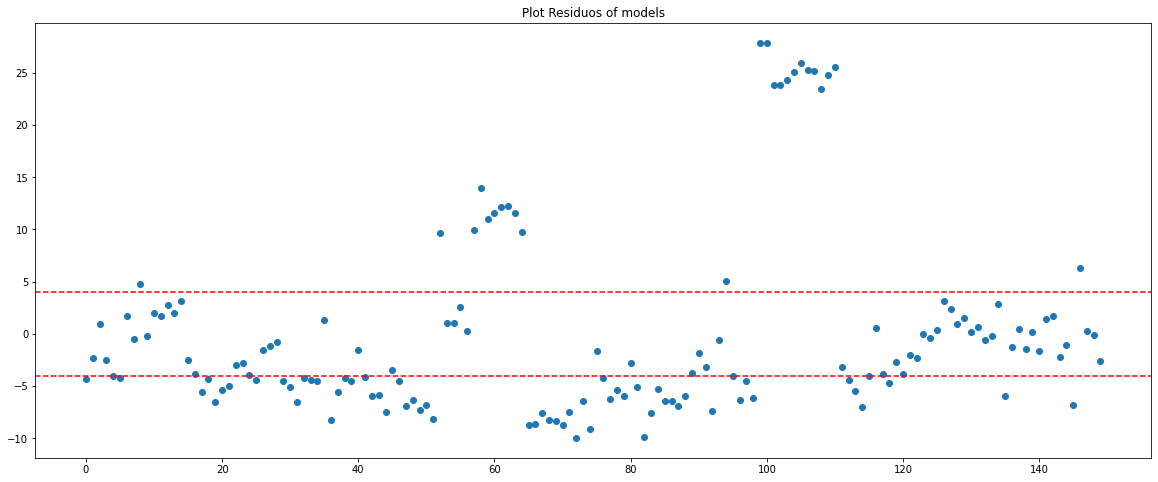

In [154]:
fig, ax=plt.subplots(figsize=(20, 8))

print('quantile of residuos:\n ')
print([('quantile:'+str(x),full_model_fit.resid.quantile(x)) for x in np.arange(0,1.01,0.25)])
plt.scatter(np.arange(0,nrows,1),full_model_fit.resid)
plt.title('Plot Residuos of models')
plt.axhline(y = -4, color = 'r', linestyle = '--')
plt.axhline(y = 4, color = 'r', linestyle = '--')

### Keypoint fit of model

- There are not evidence with error is Normal(0,1), is this case not recommend regression linear model


### Try to create new variable

Log(Y)

In [155]:
df_data_model['log_Color'] = np.log(df_data_model['Color'])

In [156]:
Y = df_data_model[['log_Color']]
full_model = sm.OLS(Y, X)
full_model_fit = full_model.fit()
full_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              log_Color   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              537.6
Date:                Sun, 11 Dec 2022   Prob (F-statistic):                   2.21e-112
Time:                        19:43:25   Log-Likelihood:                         -59.649
No. Observations:                 150   AIC:                                      149.3
Df Residuals:                     135   BIC:                                      194.5
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
log_a1         2.5783      2.788      0.925      0.357      -2.936       8.093
log_a2         0.1186      0.941      0.126      0.900      -1.742       1.979
log_a3        -0.7862      0.812     -0.968      0.335      -2.393       0.820
log_a4        -1.9221      1.233     -1.558      0.121      -4.361       0.517
log_a5        -3.2937      5.055     -0.652      0.516     -13.290       6.703
log_a6         0.2903      1.015      0.286      0.775      -1.717       2.297
log_a7        -0.0866      0.791     -0.109      0.913      -1.651       1.478
log_a8        -0.8005      0.489     -1.638      0.104      -1.767       0.166
a9            -0.1655      0.052     -3.210      0.002      -0.267      -0.064
a10            0.1879      0.102      1.836      0.068      -0.014       0.390
log_a11        0.1954      0.286      0.684      0.495      -0.370       0.761
log_a12       -0.0516      0.494     -0.105      0.917      -1.028       0.925
a13            0.8194      2.696      0.304      0.762      -4.512       6.151
a14           -0.6286      0.438     -1.434      0.154      -1.495       0.238
a15            0.8608      1.983      0.434      0.665      -3.061       4.783
==============================================================================
Omnibus:                       45.729   Durbin-Watson:                   0.371
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.705
Skew:                           1.555   Prob(JB):                     2.21e-17
Kurtosis:                       4.615   Cond. No.                     5.68e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

quantile of residuos:
 
[('quantile:0.0', 0.6322037024316705), ('quantile:0.25', 0.7842953550828795), ('quantile:0.5', 0.8909230817828755), ('quantile:0.75', 1.05688792589633), ('quantile:1.0', 2.940100986448448)]


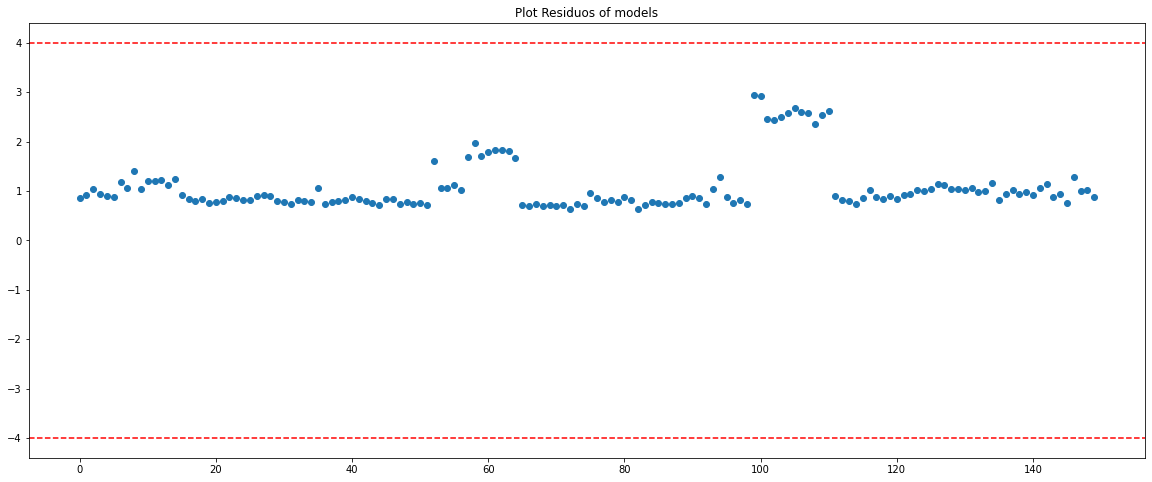

In [157]:
fig, ax=plt.subplots(figsize=(20, 8))

print('quantile of residuos:\n ')
print([('quantile:'+str(x),np.exp(full_model_fit.resid.quantile(x))) for x in np.arange(0,1.01,0.25)])
plt.scatter(np.arange(0,nrows,1),np.exp(full_model_fit.resid))
plt.title('Plot Residuos of models')
plt.axhline(y = -4, color = 'r', linestyle = '--')
plt.axhline(y = 4, color = 'r', linestyle = '--')

### new model is good fit

- Normal distribution for error
- Model with variable log(Y) insted of Y is a best model


### Final Model

$
  log(Y) =log(A8) + A9 + A10 + e
$

Where,

    Y = Color
    
    A8 = Total cold wort
    A9 = pH
    A10 = Extract
    e = Random variable with Normal N(0,1)

In [158]:
features_model = ['log_a8','a9', 'a10']

Y = df_data_model[['log_Color']]
X = df_data_model[features_model]

nrows = len(Y)
print(X.shape, Y.shape)

(150, 3) (150, 1)


In [161]:
X

,log_a8,a9,a10
0,6.865787,7.296127,15.309445
1,6.870261,7.219022,15.285057
2,6.992992,7.182910,14.155171
8,6.861292,5.562243,14.656477
9,6.871377,5.562243,14.653028
...,...,...,...
195,6.582579,5.675958,15.391623
196,6.174879,5.642286,14.229196
197,6.046130,5.632526,14.224360
198,6.882463,5.801374,16.320075


In [162]:
Y = df_data_model[['log_Color']]
final_model = sm.OLS(Y, X)
final_model_fit = final_model.fit()
final_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              log_Color   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                              2388.
Date:                Sun, 11 Dec 2022   Prob (F-statistic):                   1.92e-124
Time:                        19:45:56   Log-Likelihood:                         -74.643
No. Observations:                 150   AIC:                                      155.3
Df Residuals:                     147   BIC:                                      164.3
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
log_a8         0.8632      0.180      4.796      0.000       0.508       1.219
a9            -0.1113      0.047     -2.352      0.020      -0.205      -0.018
a10           -0.1637      0.075     -2.173      0.031      -0.313      -0.015
==============================================================================
Omnibus:                       41.235   Durbin-Watson:                   0.364
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.377
Skew:                           1.505   Prob(JB):                     1.05e-14
Kurtosis:                       4.116   Cond. No.                         105.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

quantile of residuos:
 
[('quantile:0.0', 0.6429012003043428), ('quantile:0.25', 0.7935019869972277), ('quantile:0.5', 0.850271677561576), ('quantile:0.75', 1.085151853951707), ('quantile:1.0', 2.9267615427946754)]


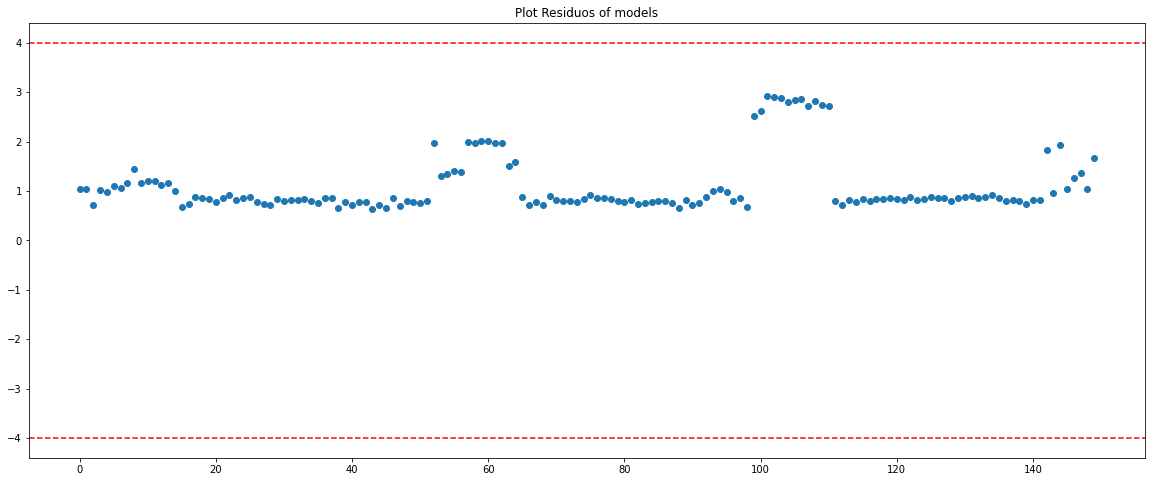

In [163]:
fig, ax=plt.subplots(figsize=(20, 8))

print('quantile of residuos:\n ')
print([('quantile:'+str(x),np.exp(final_model_fit.resid.quantile(x))) for x in np.arange(0,1.01,0.25)])
plt.scatter(np.arange(0,nrows,1),np.exp(final_model_fit.resid))
plt.title('Plot Residuos of models')
plt.axhline(y = -4, color = 'r', linestyle = '--')
plt.axhline(y = 4, color = 'r', linestyle = '--')

### Apply model to predict

In [185]:
#select x values
features_final_model = ['Total cold wort', 'pH', 'Extract']
df_test_x = df_test[features_final_model].copy()
df_test_x['Total cold wort'] = np.log(df_test_x['Total cold wort'])
df_test_x


,Total cold wort,pH,Extract
38,6.865787,5.565181,15.134790
39,6.861292,5.647166,15.413623
40,6.866907,5.652046,15.787452
41,6.871377,5.675958,15.677505
42,6.870261,5.671078,15.653609
43,6.875826,5.675958,15.453057
44,6.869144,5.938992,15.619666
45,6.868026,5.593973,15.536345
46,6.875826,5.719391,15.579120
47,6.870261,5.729151,15.688546


In [189]:
logy_predict = final_model_fit.predict(df_test_x)
y_predict = np.exp(logy_predict)

# apply in dataframe
df_test['y_predict'] = [x for x in y_predict]


In [197]:
df_real_values = pd.DataFrame(columns=['Color','compare'])
df_real_values['Color'] = df_train['Color']
df_real_values['compare'] = 'real'

df_estimate_values = pd.DataFrame(columns=['Color','compare'])
df_estimate_values['Color'] = df_test['y_predict']
df_estimate_values['compare'] = 'estimate'

df_compare_values = pd.concat([df_real_values, df_estimate_values],ignore_index=True)
df_compare_values.sample(5)


,Color,compare
39,12.989932,real
95,13.857879,real
108,44.990000,real
166,14.828422,estimate
26,12.772422,real


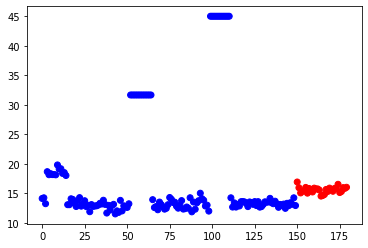

In [201]:
fig, ax = plt.subplots()

colors = {'real':'blue', 'estimate':'red'}

ax.scatter(df_compare_values.index, df_compare_values['Color'], c=df_compare_values['compare'].map(colors))

plt.show()